In [1]:
import pandas as pd 
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
import seaborn as sns
import yfinance as yf 

ativos = ['VIIA3.SA', 'JHSF3.SA', 'PETZ3.SA', 'B3SA3.SA','EZTC3.SA']

inicio = '2021-01-01'
fim = '2022-10-30'

yf.download('VIIA3.SA', start=inicio, end=fim)['Adj Close']

[*********************100%***********************]  1 of 1 completed


Date
2021-01-04    16.170000
2021-01-05    16.219999
2021-01-06    15.490000
2021-01-07    15.080000
2021-01-08    15.530000
                ...    
2022-10-24     3.000000
2022-10-25     3.030000
2022-10-26     2.800000
2022-10-27     2.930000
2022-10-28     3.040000
Name: Adj Close, Length: 455, dtype: float64

In [3]:
df = pd.DataFrame()
df
for ativo in ativos:
  df[ativo] = yf.download(ativo, start=inicio, end=fim)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
df.iloc[0]
normalizado = df/df.iloc[0]
normalizado

,VIIA3.SA,JHSF3.SA,PETZ3.SA,B3SA3.SA,EZTC3.SA
Date,,,,,
2021-01-04,1.000000,1.000000,1.000000,1.000000,1.000000
2021-01-05,1.003092,0.989247,1.000538,1.001968,0.976019
2021-01-06,0.957947,0.950269,0.949408,0.985569,0.936451
2021-01-07,0.932591,0.943548,0.942949,1.013119,0.918945
2021-01-08,0.960421,0.994624,0.975781,1.028042,0.969784
...,...,...,...,...,...
2022-10-24,0.185529,1.114530,0.456313,0.754376,0.525298
2022-10-25,0.187384,1.087198,0.451993,0.744167,0.515094
2022-10-26,0.173160,1.073532,0.429852,0.708168,0.489071


<AxesSubplot:xlabel='Date'>

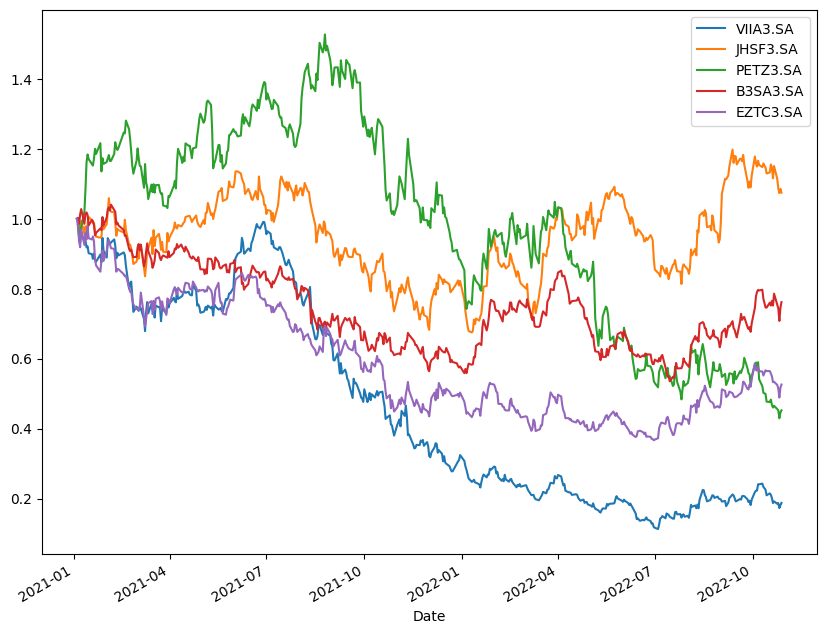

In [5]:
normalizado.plot(figsize=(10,8))

In [6]:
retornos_diarios = df.pct_change()
retornos_diarios.head()

,VIIA3.SA,JHSF3.SA,PETZ3.SA,B3SA3.SA,EZTC3.SA
Date,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.003092,-0.010753,0.000538,0.001968,-0.023981
2021-01-06,-0.045006,-0.039402,-0.051103,-0.016367,-0.040541
2021-01-07,-0.026469,-0.007072,-0.006803,0.027954,-0.018694
2021-01-08,0.029841,0.054131,0.034817,0.014730,0.055324


In [7]:
retornos_diarios.dropna(inplace=True)
retornos_diarios

,VIIA3.SA,JHSF3.SA,PETZ3.SA,B3SA3.SA,EZTC3.SA
Date,,,,,
2021-01-05,0.003092,-0.010753,0.000538,0.001968,-0.023981
2021-01-06,-0.045006,-0.039402,-0.051103,-0.016367,-0.040541
2021-01-07,-0.026469,-0.007072,-0.006803,0.027954,-0.018694
2021-01-08,0.029841,0.054131,0.034817,0.014730,0.055324
2021-01-11,-0.026401,-0.037838,0.045229,-0.041155,-0.045747
...,...,...,...,...,...
2022-10-24,-0.035370,-0.031662,-0.019722,-0.040328,-0.016714
2022-10-25,0.010000,-0.024523,-0.009467,-0.013533,-0.019427
2022-10-26,-0.075908,-0.012570,-0.048984,-0.048375,-0.050520


<AxesSubplot:xlabel='Date'>

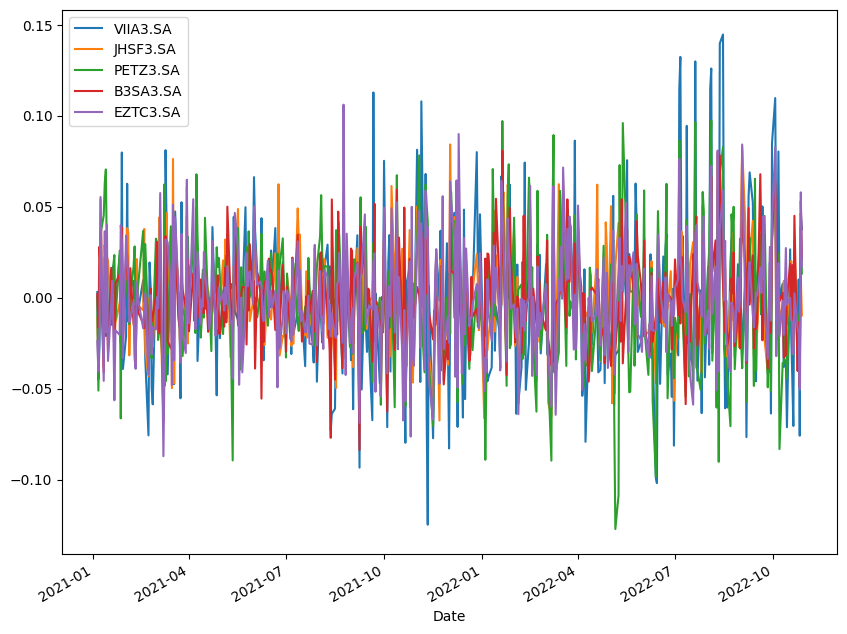

In [8]:
retornos_diarios.plot(figsize=(10,8))

In [9]:
retornos_diarios.std()

VIIA3.SA    0.040094
JHSF3.SA    0.026833
PETZ3.SA    0.034862
B3SA3.SA    0.024316
EZTC3.SA    0.029625
dtype: float64

In [10]:
volatilidade = pd.DataFrame(retornos_diarios.std(), columns =['Vol'])
volatilidade

,Vol
VIIA3.SA,0.040094
JHSF3.SA,0.026833
PETZ3.SA,0.034862
B3SA3.SA,0.024316
EZTC3.SA,0.029625


In [11]:
retornos_medios = pd.DataFrame(retornos_diarios.mean(), columns = ['Retornos'])
retornos_medios

,Retornos
VIIA3.SA,-0.002881
JHSF3.SA,0.000517
PETZ3.SA,-0.001138
B3SA3.SA,-0.000304
EZTC3.SA,-0.000977


In [12]:
risco_retorno = pd.concat([retornos_medios,volatilidade], axis=1)
risco_retorno

,Retornos,Vol
VIIA3.SA,-0.002881,0.040094
JHSF3.SA,0.000517,0.026833
PETZ3.SA,-0.001138,0.034862
B3SA3.SA,-0.000304,0.024316
EZTC3.SA,-0.000977,0.029625


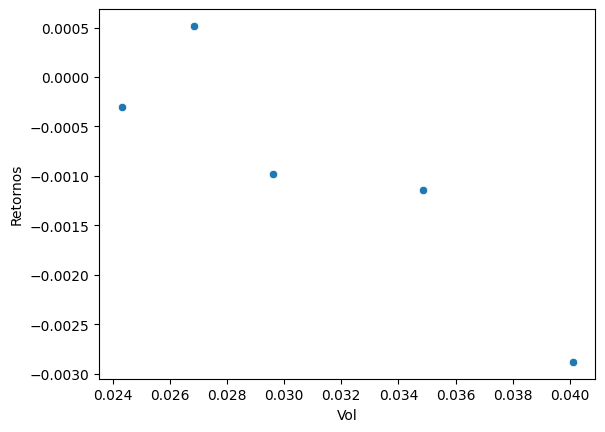

In [16]:
sns.scatterplot(data = risco_retorno, x='Vol', y='Retornos');

In [18]:
range(risco_retorno.shape[0])

range(0, 5)

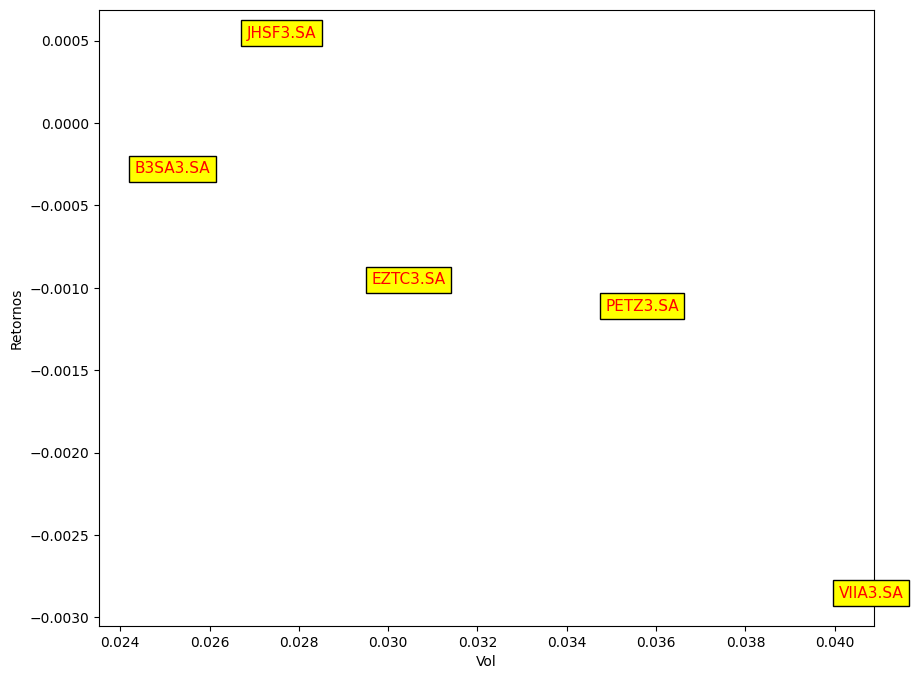

In [15]:
plt.subplots(figsize = (10,8))
sns.scatterplot(data = risco_retorno, x='Vol', y='Retornos');

for i in range(risco_retorno.shape[0]):
  plt.text(x = risco_retorno.Vol[i], y=risco_retorno.Retornos[i], s = risco_retorno.index[i], 
           fontdict=dict(color='red', size=11),
           bbox=dict(facecolor='yellow'))